# Position of Quasar

### Homoscedastic Errors
You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

In [142]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

#### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.



In [143]:
sigma = 0.2
mu =1
dist_true = scipy.stats.norm(loc = mu, scale=sigma)

N=5
data = dist_true.rvs(size=N)

- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.

In the following the individual likelihoods are gaussian. The likelihood of the entire dataset would be the product of all individual likelihoods:
$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

The aim is to find numerically the maximum of the likelihood in order to estimate the model parameters (that for a gaussian are mean and sigma, but since sigma is constant and known it would be neglected)

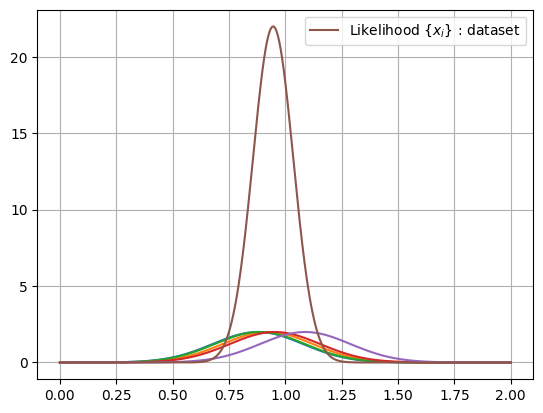

In [144]:
# sigma is known!
xx = np.linspace(0,2,1000)
likelihoods = []
for x in data:
    dist = scipy.stats.norm(loc = x, scale = sigma)
    likelihoods.append(dist.pdf(xx))
    plt.plot(xx, dist.pdf(xx))
likelihood_dataset=np.prod(likelihoods, axis=0)
plt.plot(xx, likelihood_dataset, label = r'Likelihood {$x_i$} : dataset')
plt.legend()
plt.grid()




- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

In [145]:
ind = np.argsort(likelihood_dataset)
print('The Maximum Likelihood corresponds to : {:.4f}'.format(xx[ind[-1]]))
print('Compared with the mean (as ML estimator): {:.4f}'.format(np.mean(data)))

The Maximum Likelihood corresponds to : 0.9449
Compared with the mean (as ML estimator): 0.9458


### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above


The computation of the mean would have its own uncertainty described by the Fisher Information Matrix. 

The Fisher Information matrix is defined by a 2 order Taylor Expansion around the Estimator:
$$ F_{jk} = - \frac{d^2 \ln L}{d\theta_j d\theta_k} \Biggr\rvert_{\theta=\hat \theta}.$$

with the uncertainty:

$$\sigma_{jk} = \sqrt{[F^{-1}]_{jk}}, $$

In [146]:
#Log-likelihood
log_likelihood_dataset = np.log(likelihood_dataset)

#Fisher Matrix
#Differentiation
sigma_mu = np.diff(log_likelihood_dataset, n=2)
#Normalisation
sigma_mu /= (xx[1] - xx[0])**2
#Multiply -1 and 1/square root
sigma_mu = (1/(sigma_mu*-1)**0.5)

print('Fisher Matrix Error by Likelihood : {:.5f}'.format(sigma_mu[0]))
print('Fisher Matrix Error by known sigma : {:.5f}'.format(sigma/(N)**0.5))


Fisher Matrix Error by Likelihood : 0.08944
Fisher Matrix Error by known sigma : 0.08944


- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

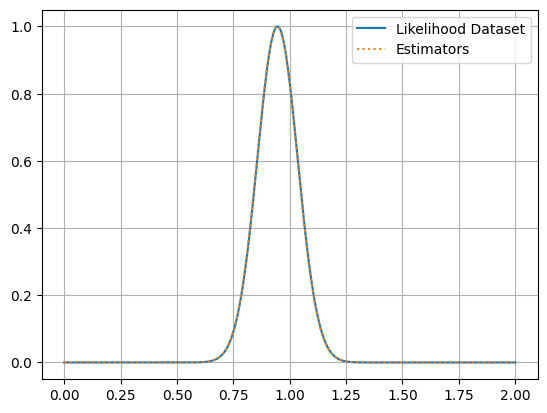

In [147]:
likelihood_estimator = scipy.stats.norm(loc=xx[ind[-1]], scale = sigma/np.sqrt(N))
likelihood_estimator = likelihood_estimator.pdf(xx)

plt.plot(xx, likelihood_dataset/np.max(likelihood_dataset), label = 'Likelihood Dataset')
plt.plot(xx, likelihood_estimator/np.max(likelihood_estimator), label='Estimators', linestyle = ':')
plt.grid()
plt.legend()

## Heteroscedastic Errors

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

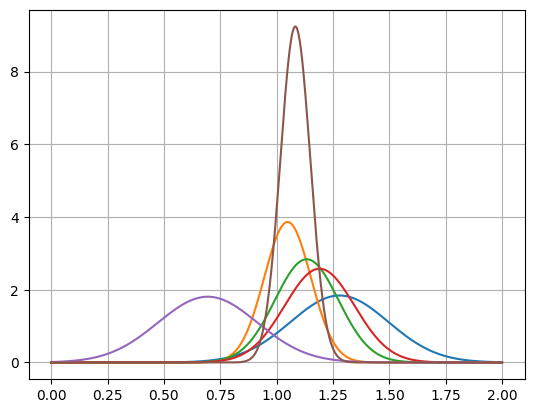

In [148]:
#Sigma is not constant!
sigma_dist = scipy.stats.norm(loc=0.2, scale = 0.05)
sigma = sigma_dist.rvs(N)

data = []
likelihoods = []
for s in sigma:
    # Distribution from a sigma
    dist = scipy.stats.norm(loc=mu, scale=s)
    data.append(dist.rvs(1))
    # Distribution centered at retrived x
    l = scipy.stats.norm(loc = data[-1], scale = s)
    likelihoods.append(l.pdf(xx))
    plt.plot(xx, likelihoods[-1])
data=np.concatenate(data) # as the same shape of sigma variable 
likelihood_dataset = np.prod(likelihoods, axis=0)
plt.plot(xx, likelihood_dataset, label = r'Likelihood {$x_i$} : dataset')
plt.grid()


In [149]:
ind = np.argsort(likelihood_dataset)
print('The Maximum Likelihood corresponds to : {:.4f}'.format(xx[ind[-1]]))

#Weighted Mean
weight = 1/sigma**2
print('Compared with the mean (as ML estimator): {:.4f}'.format(np.average(data, weights=weight)))

The Maximum Likelihood corresponds to : 1.0831
Compared with the mean (as ML estimator): 1.0831


In [150]:
#Log-likelihood
log_likelihood_dataset = np.log(likelihood_dataset)

#Fisher Matrix
#Differentiation
sigma_mu = np.diff(log_likelihood_dataset, n=2)
#Normalisation
sigma_mu /= (xx[1] - xx[0])**2
#Multiply -1 and 1/square root
sigma_mu = (1/(sigma_mu*-1)**0.5)

print('Fisher Matrix Error by Likelihood : {:.6f}'.format(sigma_mu[0]))
print('Fisher Matrix Error by known sigma : {:.6f}'.format(np.sum(sigma**-2)**-0.5))

Fisher Matrix Error by Likelihood : 0.066199
Fisher Matrix Error by known sigma : 0.066199


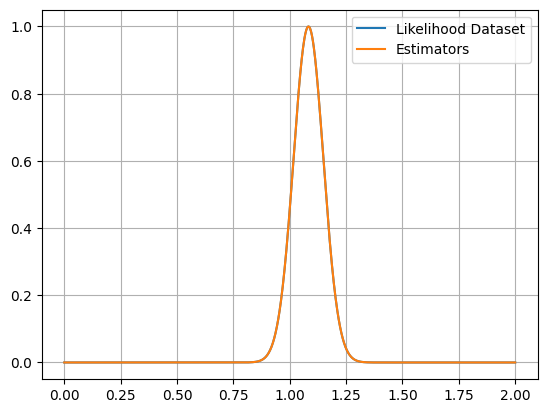

In [151]:
likelihood_estimator = scipy.stats.norm(loc=np.average(data, weights=weight), scale = np.sum(sigma**-2)**-0.5)
likelihood_estimator = likelihood_estimator.pdf(xx)

plt.plot(xx, likelihood_dataset/np.max(likelihood_dataset), label = 'Likelihood Dataset')
plt.plot(xx, likelihood_estimator/np.max(likelihood_estimator), label='Estimators')
plt.grid()
plt.legend()